# Titanic Project

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Machine Learning models

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation
from sklearn.model_selection import cross_val_score

### Import And Read Data

In [4]:
pd.set_option("display.max_columns", None)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gs = pd.read_csv('gender_submission.csv')

print('Train Set:')

train.head()

Train Set:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('Test Set:')

test.head()

Test Set:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print('Training set shape:')
train.shape

Training set shape:


(891, 12)

In [7]:
print('Test set shape:')
test.shape

Test set shape:


(418, 11)

In [8]:
print('Gender submission set:')
gs.head()

Gender submission set:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
print('Gender submission set shape: ')
gs.shape

Gender submission set shape: 


(418, 2)

### Data Types Of The Training And Test Set

In [10]:
print('Non-null count and data types of the training and test set:')

train.info()

Non-null count and data types of the training and test set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Missing data in Training and Test set by columns

In [12]:
print('Missing data in Training and Test set by columns:')

train.isnull().sum().sort_values(ascending=False)

Missing data in Training and Test set by columns:


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [13]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

### Summary Statistics

In [14]:
print('Summary statistics for training set:')
train.describe()

Summary statistics for training set:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
print('Summary statistics for test set:')
test.describe()

Summary statistics for test set:


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Feature analysis

### Categorical variables (Sex, Pclass and Embarked)

### Value counts of the sex column

In [16]:
print('Value counts of the sex column:')
train['Sex'].value_counts(dropna=False)

Value counts of the sex column:


male      577
female    314
Name: Sex, dtype: int64

### Mean of survival by sex

In [17]:
print('Mean of survival by sex:')
train[['Sex', 'Survived']]. groupby('Sex', as_index=False).mean()

Mean of survival by sex:


,Sex,Survived
0,female,0.742038
1,male,0.188908


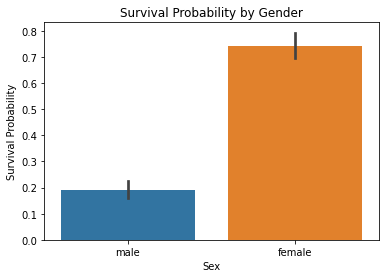

In [18]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')
plt.show()

### Value counts of the Pclass column 

In [19]:
print('Value counts of the Pclass column:')
train['Pclass'].value_counts(dropna=False)

Value counts of the Pclass column:


3    491
1    216
2    184
Name: Pclass, dtype: int64

### Mean of survival by Pclass 

In [20]:
print('Mean of survival by passenger class:')
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Mean of survival by passenger class:


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


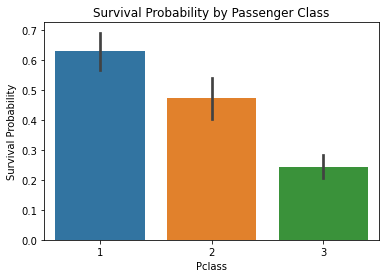

In [21]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')
plt.show()

### Value counts of the Embarked column 

In [22]:
print('Value counts of the Embarked column:')
train['Embarked'].value_counts(dropna=False)

Value counts of the Embarked column:


S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

### Mean of survival by embarkation 

In [23]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


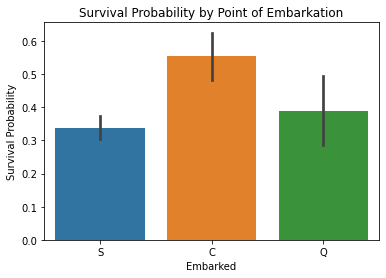

In [24]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')
plt.show()

### Survival probability by all categorical variables 

/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


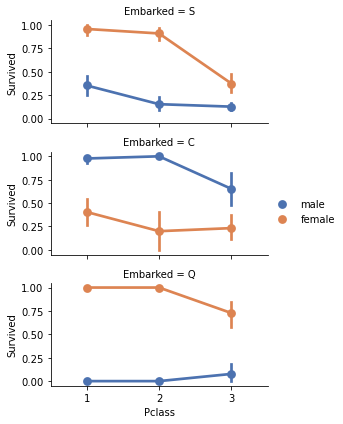

In [25]:
grid = sns.FacetGrid(train, row='Embarked', size=2, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
plt.show()

### Numerical Variables(SibSp, Parch, Age and Fare) 

### Value counts of the SibSp column 

In [26]:
print('Value counts of the SibSp column:')
train['SibSp'].value_counts(dropna=False)

Value counts of the SibSp column:


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### Mean of survival by SibSp 

In [27]:
print('Mean of survival by SibSp:\n')
train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

Mean of survival by SibSp:



,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


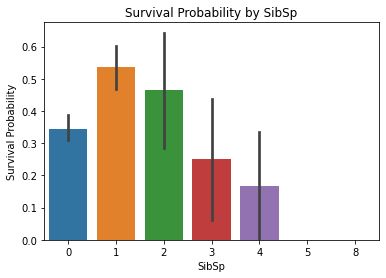

In [28]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')
plt.show()

### Value counts of the Parch column

In [29]:
print('Value counts of the Parch column:')
train['Parch'].value_counts(dropna=False)

Value counts of the Parch column:


0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

### Mean of survival by Parch

In [30]:
print('Mean of survival by Parch:')
train[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

Mean of survival by Parch:


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


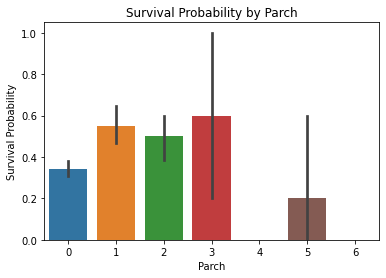

In [31]:
sns.barplot(x='Parch', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')
plt.show()

### Drop And Fill Missing Values 

In [32]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [33]:
# Missing values in training set

train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [34]:
# The most frequent value of Embarked in training set

mode = train['Embarked'].dropna().mode()[0]
print('The most frequent value of Embarked in training set:\n', mode)

The most frequent value of Embarked in training set:
 S


In [35]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace=True)

In [36]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Embarked         0
dtype: int64

In [37]:
# Median of Fare in test set

median = test['Fare'].dropna().median()
print('Median of Fare in test set:\n', median)

Median of Fare in test set:
 14.4542


In [38]:
# Fill missing value in Fare with median

test['Fare'].fillna(median, inplace=True)

In [39]:
# Combine training set and test set

train_test = pd.concat([train, test], axis=0).reset_index(drop=True)
train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [40]:
# Missing values in the combined dataset

train_test.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Fare              0
Embarked          0
dtype: int64

### Cabin

In [41]:
train_test["Cabin"] = train_test["Cabin"].fillna("Z")
train_test["Cabin"] = train_test["Cabin"].str[0:1]

In [42]:
train[['Cabin', 'Survived']].groupby('Cabin', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
73,C62 C64,1.0
97,D21,1.0
94,D17,1.0
95,D19,1.0
60,C148,1.0
...,...,...
67,C46,0.0
64,C30,0.0
59,C128,0.0
56,C124,0.0


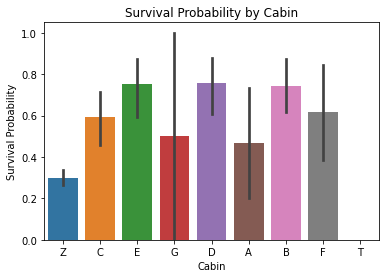

In [43]:
sns.barplot(x='Cabin', y='Survived', data=train_test)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Cabin')
plt.show()

In [133]:
train_test['Cabin'] = train_test['Cabin'].map({'T': 0, 'Z': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B':6, 'E':7, 'D': 8})

In [134]:
train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,4,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,4,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,S


### Age

In [135]:
age_nan_indices = list(train_test[train_test['Age'].isnull()].index)
len(age_nan_indices)

263

In [136]:
# Missing ages

for index in age_nan_indices:
    median_age = train_test['Age'].median()
    predict_age = train_test['Age'][(train_test['SibSp'] == train_test.iloc[index]['SibSp']) 
                                 & (train_test['Parch'] == train_test.iloc[index]['Parch'])
                                 & (train_test['Pclass'] == train_test.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        train_test['Age'].iloc[index] = median_age
    else:
        train_test['Age'].iloc[index] = predict_age

/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [137]:
print('Missing ages: ', train_test['Age'].isnull().sum())

Missing ages:  0


In [138]:
train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,4,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,4,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,S


/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


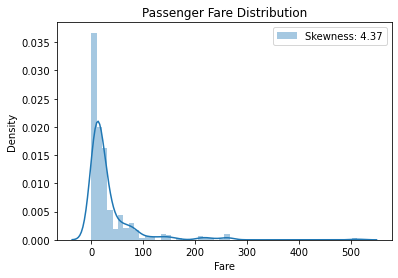

In [139]:
# Passenger fare distribution

sns.distplot(train_test['Fare'], label='Skewness: %.2f'%(train_test['Fare'].skew()))
plt.legend(loc='best')
plt.title('Passenger Fare Distribution')
plt.show()

In [140]:
# Apply log transformation to Fare column to reduce skewness

train_test['Fare'] = train_test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


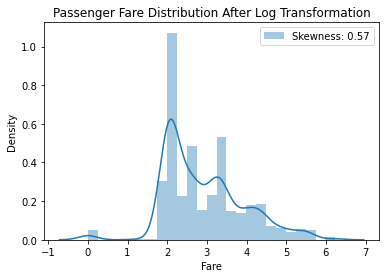

In [141]:
# Passenger fare distribution after log transformation

sns.distplot(train_test['Fare'], label='Skewness: %.2f'%(train_test['Fare'].skew()))
plt.legend(loc='best')
plt.title('Passenger Fare Distribution After Log Transformation')
plt.show()

### Feature Engineering 

### Title(Mr, Mrs, Miss) 

In [142]:
train_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,1,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,4,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,1,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,4,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,1,S


In [143]:
train_test['Title'] = [name.split(',')[1].split('.')[0].strip() for name in train_test['Name']]

train_test[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [144]:
# Value counts of Title

train_test['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
the Countess      1
Capt              1
Don               1
Sir               1
Lady              1
Jonkheer          1
Dona              1
Mme               1
Name: Title, dtype: int64

In [145]:
print('Number of unique Title:')

train_test['Title'].nunique()

Number of unique Title:


18

In [146]:
train_test['Title'] = train_test['Title'].replace(['Rev','Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess','Dona'], 'Rare')
train_test['Title'] = train_test['Title'].replace(['Dr','Col','Major','Sir'],'DCMS')
train_test['Title'] = train_test['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_test['Title'] = train_test['Title'].replace('Mme', 'Mrs')

train_test['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
DCMS       15
Rare       14
Name: Title, dtype: int64

In [147]:
# Mean of survival by name title

train_test[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
4,Mrs,0.793651
2,Miss,0.702703
1,Master,0.575000
0,DCMS,0.500000
5,Rare,0.181818
3,Mr,0.156673


/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


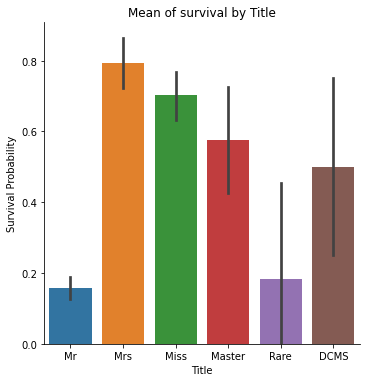

In [148]:
sns.factorplot(x='Title', y='Survived', data=train_test, kind='bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')
plt.show()

In [149]:
# Drop name column

train_test = train_test.drop('Name', axis=1)

train_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,1.981001,1,S,Mr
1,2,1.0,1,female,38.0,1,0,4.266662,4,C,Mrs
2,3,1.0,3,female,26.0,0,0,2.070022,1,S,Miss
3,4,1.0,1,female,35.0,1,0,3.972177,4,S,Mrs
4,5,0.0,3,male,35.0,0,0,2.085672,1,S,Mr


### Calculate family size from SibSp and Parch 

In [150]:
train_test['FamilySize'] = train_test['SibSp'] + train_test['Parch'] + 1

train_test[['SibSp', 'Parch', 'FamilySize']].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [151]:
# Mean of survival by family size

train_test[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [152]:
# Create Alone feature

train_test['Alone'] = 0
train_test.loc[train_test['FamilySize'] == 1, 'Alone'] = 1

In [153]:
# Mean of survival by Alone

train_test[['Alone', 'Survived']].groupby('Alone', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [154]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

train_test = train_test.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
train_test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,male,22.0,1.981001,1,S,Mr,0
1,2,1.0,1,female,38.0,4.266662,4,C,Mrs,0
2,3,1.0,3,female,26.0,2.070022,1,S,Miss,1
3,4,1.0,1,female,35.0,3.972177,4,S,Mrs,0
4,5,0.0,3,male,35.0,2.085672,1,S,Mr,1


### Age*Class

In [155]:
train_test['AgeBand'] = pd.cut(train_test['Age'], 5)
train_test[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.500000
1,"(16.136, 32.102]",0.341719
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [156]:
train_test.loc[train_test['Age'] <= 16.136, 'Age'] = 0
train_test.loc[(train_test['Age'] > 16.136) & (train_test['Age'] <= 32.102), 'Age'] = 1
train_test.loc[(train_test['Age'] > 32.102) & (train_test['Age'] <= 48.068), 'Age'] = 2
train_test.loc[(train_test['Age'] > 48.068) & (train_test['Age'] <= 64.034), 'Age'] = 3
train_test.loc[train_test['Age'] > 64.034, 'Age'] = 4

In [157]:
train_test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone,AgeBand
0,1,0.0,3,male,1.0,1.981001,1,S,Mr,0,"(16.136, 32.102]"
1,2,1.0,1,female,2.0,4.266662,4,C,Mrs,0,"(32.102, 48.068]"
2,3,1.0,3,female,1.0,2.070022,1,S,Miss,1,"(16.136, 32.102]"
3,4,1.0,1,female,2.0,3.972177,4,S,Mrs,0,"(32.102, 48.068]"
4,5,0.0,3,male,2.0,2.085672,1,S,Mr,1,"(32.102, 48.068]"


In [158]:
# Drop age band feature

train_test = train_test.drop('AgeBand', axis=1)

In [159]:
train_test['Age'] = train_test['Age'].astype('int')

In [160]:
# Create Age_Pclass feature

train_test['Age_Class'] = train_test['Age'] * train_test['Pclass']
train_test[['Age', 'Pclass', 'Age_Class']].head()

,Age,Pclass,Age_Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


### Feature Encoding

In [161]:
# Encode Title and Embarked feature

train_test = pd.get_dummies(train_test, columns=['Title'])
train_test = pd.get_dummies(train_test, columns=['Embarked'], prefix='Em')

train_test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Alone,Age_Class,Title_DCMS,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,male,1,1.981001,1,0,3,0,0,0,1,0,0,0,0,1
1,2,1.0,1,female,2,4.266662,4,0,2,0,0,0,0,1,0,1,0,0
2,3,1.0,3,female,1,2.070022,1,1,3,0,0,1,0,0,0,0,0,1
3,4,1.0,1,female,2,3.972177,4,0,2,0,0,0,0,1,0,0,0,1
4,5,0.0,3,male,2,2.085672,1,1,6,0,0,0,1,0,0,0,0,1


In [162]:
# Divide Fare into four bands

train_test['FareBand'] = pd.cut(train_test['Fare'], 4)
train_test[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.504983
3,"(4.679, 6.239]",0.745098


In [163]:
# Assign ordinal to each fare band

train_test.loc[train_test['Fare'] <= 1.56, 'Fare'] = 0
train_test.loc[(train_test['Fare'] > 1.56) & (train_test['Fare'] <= 3.119), 'Fare'] = 1
train_test.loc[(train_test['Fare'] > 3.119) & (train_test['Fare'] <= 4.679), 'Fare'] = 2
train_test.loc[train_test['Fare'] > 4.679, 'Fare'] = 3

In [164]:
# Convert Fare into integer

train_test['Fare'] = train_test['Fare'].astype('int')

In [165]:
# Drop FareBand feature

train_test = train_test.drop('FareBand', axis=1)

In [166]:
# Convert Sex into numerical values where 0 = male and 1 = female

train_test['Sex'] = train_test['Sex'].map({'male': 0, 'female': 1})

In [167]:
train_test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Alone,Age_Class,Title_DCMS,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,1,0,3,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,4,0,2,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,1,3,0,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,4,0,2,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,1,6,0,0,0,1,0,0,0,0,1


### Separate training and test set from the combined dataframe

In [168]:
train = train_test[:len(train)]
test = train_test[len(train):]

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Alone,Age_Class,Title_DCMS,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,1,0,3,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,4,0,2,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,1,3,0,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,4,0,2,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,1,6,0,0,0,1,0,0,0,0,1


In [169]:
train = train.drop('PassengerId', axis=1)

In [170]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')

In [171]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Alone,Age_Class,Title_DCMS,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,892,NaN,3,0,2,1,1,1,6,0,0,0,1,0,0,0,1,0
892,893,NaN,3,1,2,1,1,0,6,0,0,0,0,1,0,0,0,1
893,894,NaN,2,0,3,1,1,1,6,0,0,0,1,0,0,0,1,0
894,895,NaN,3,0,1,1,1,1,3,0,0,0,1,0,0,0,0,1
895,896,NaN,3,1,1,1,1,0,3,0,0,0,0,1,0,0,0,1


In [172]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis=1)

### Building Machine Learning Models

In [173]:
X = train.drop('Survived', axis=1)
Y = train['Survived']
X_test = test.drop('PassengerId', axis=1).copy()

print('X shape: ', X.shape)
print('Y shape: ', Y.shape)
print('X_test shape: ', X_test.shape)

X shape:  (891, 16)
Y shape:  (891,)
X_test shape:  (418, 16)


### Logistic Regression

In [174]:
logreg = LogisticRegression()
logreg.fit(X, Y)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X, Y) * 100, 2)
acc_log

/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


82.94

### KNN

In [175]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, Y)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X, Y) * 100, 2)
acc_knn

84.85

### Gaussian Naive Bayes

In [176]:
gaussian = GaussianNB()
gaussian.fit(X, Y)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X, Y) * 100, 2)
acc_gaussian

78.23

### Support Vector Machines (SVM)

In [177]:
svc = SVC()
svc.fit(X, Y)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X, Y) * 100, 2)
acc_svc

83.28

### Linear SVC

In [178]:
linear_svc = LinearSVC()
linear_svc.fit(X, Y)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X, Y) * 100, 2)
acc_linear_svc

/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


81.59

### Decision Tree

In [179]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, Y)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X, Y) * 100, 2)
acc_decision_tree

88.1

###  Random Forest

In [180]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X, Y) * 100, 2)
acc_random_forest

88.1

### The Best Model

In [181]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Gaussian NB', 'SVC', 'Linear SVC', 'Decision Tree', 'Random Forest'], 'Score': [acc_log, acc_knn, acc_gaussian, acc_svc, acc_linear_svc, acc_decision_tree, acc_random_forest]})

models.sort_values(by='Score', ascending=False, ignore_index=True)

,Model,Score
0,Decision Tree,88.10
1,Random Forest,88.10
2,KNN,84.85
3,SVC,83.28
4,Logistic Regression,82.94
5,Linear SVC,81.59
6,Gaussian NB,78.23


### Cross Validation

In [182]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(SVC())
classifiers.append(LinearSVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())

len(classifiers)

7

In [183]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X, Y, scoring = 'accuracy', cv = 10))

/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [184]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [185]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'KNN', 'Gausian Naive Bayes', 'SVC', 'Linear SVC', 'Decision Tree', 'Random Forest']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.822684,0.032013,SVC
1,0.820424,0.034818,Logistic Regression
2,0.811498,0.034392,Random Forest
3,0.809189,0.028510,Linear SVC
4,0.801348,0.037605,KNN
5,0.794669,0.038228,Decision Tree
6,0.780062,0.026284,Gausian Naive Bayes


/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cross Validation Scores')

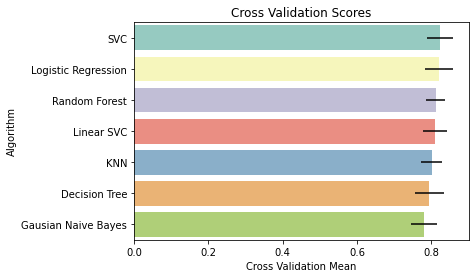

In [186]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

In [187]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X, Y)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X, Y) * 100, 2)
acc_svc

84.62

In [188]:
# Mean cross validation score

cross_val_score(svc, X, Y, scoring = 'accuracy', cv = 10).mean()

0.8338951310861423

In [189]:
# Survival predictions by SVC

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [190]:
len(Y_pred)

418

In [191]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


In [192]:
submit.shape

(418, 2)

In [193]:
# Create and save csv file 

submit.to_csv('Submit.csv', index=False)